# 4.9: 基于量子纠缠的特征选择

> References:
> * _Feature Extraction by Tensor Network Machine Learning_
> * _Unsupervised Recognition of Informative Features via Tensor Network Machine Learning and Quantum Entanglement Variations_


核心思想：利用量子概率诠释实现特征提取，属于量子启发（quantum-inspired）的机器学习解释性（interpretability）理论

本节的核心概念：二分纠缠熵（bipartite entanglement entropy）

在[2.6](./2-6.ipynb)中：从约化密度算符出发给出了二分纠缠谱的定义，可通过量子波函数（量子态系数）的奇异谱（奇异谱与奇异值分解的相关内容可参考[1.7](./1-7.ipynb)）或约化矩阵的本征谱给出

在[4.2](./4-2.ipynb)：我们讨论了矩阵乘积态纠缠谱与中心正交形式间的关系，并利用纠缠谱的裁剪实现了中心正交矩阵乘积态的虚拟维数最优裁剪。

## 二分纠缠熵

二分纠缠熵的统计意义来源于冯诺伊曼熵(von Neumann entropy)：系统混乱程度的刻画

设系统存在K个可能的**状态**，处于各个状态的**概率**记为$p_k$ $(k = 0,...,K-1)$，则冯诺伊曼熵满足

$$S_{VN} = -\sum_k p_k \ln p_k$$

有$p_k \geq 0$且$\sum_{k=0}^{K-1} p_k = 1$，且规定$0 \ln 0 = 0$ (该式在从原点右侧趋向于0的极限下成立)，则可以证明$0 \leq S_{VN} \leq \ln K$，当且仅当 $p_0 = p_k = \cdots = p_{K-1} = 1/K$时，右侧等号成立，$S_{VN}$极大。

> 例子，投骰子：
> 
> 所有面出现的概率都相等$p_0 = p_1 = \cdots = p_5 = 1/6$，此时相当于我们对于骰子出现的面是完全没有信息的，即不确定性最大，无论采取什么样的策略，猜中的几率均为1/6。但当骰子出现了某种问题导致某一面的概率大于了1/6，此时我们只需要猜概率最大的那一面即可，猜对的概率将大于1/6，对应的冯诺伊曼熵也会小于最大值$\ln 6$，且相对于最大值的熵的减小量刻画了上述情况下信息的增量。


### 经典和量子的本质区别

* 量子系统的状态可定义为叠加态
* 量子系统状态的定义直接影响其混乱程度的刻画

> 例：一枚经典或量子硬币（量子比特）
>
> * 状态自然地应该是"朝上"（记为0）与"朝下"（记为1），则对应的冯诺伊曼熵为$S_{VN} = -p_0 \ln p_0 - p_1 \ln p_1$；
> * 设其所处量子态为纯态$|\psi\rangle$，我们当然可以通过测量获得其向上或向下的概率$p_s = \langle\psi|s\rangle\langle s|\psi\rangle$ ($s = 0$或$1$，参考第二章第3节）子系统状态的定义直接影响其混乱程度的刻画；
> * 此时相当于选择测量算符为 $\hat{M}^{(0)} = |0\rangle\langle0|$、$\hat{M}^{(1)} = |1\rangle\langle1|$，有 $p_s = \langle\psi|\hat{M}^{(s)}|\psi\rangle$
> * 变换一组测量算符，例如$\hat{M}^{(0)} = \frac{1}{2}(|0\rangle + |1\rangle)(\langle0| + \langle1|)$、$\hat{M}^{(1)} = \frac{1}{2}(|0\rangle - |1\rangle)(\langle0| - \langle1|)$，通过简单计算得到不同的冯诺依曼熵；
> * 显然：量子系统的冯诺依曼熵与测量算符的选择相关，即量子系统的混乱程度或信息量不单单取决于系统本身，还取决于观察者的视角（测量算符的选择），这点是与经典系统具有本质区别的。
> * 注：合法的测量算符需满足
>   $$\sum_s \hat{M}^{(s)} = \hat{I}$$
>   易证，上述公式对应于测量算符得到的概率分布的归一性$\sum_s p_s = 1$。
>

### 二分纠缠熵的数学定义

> 为什么要用二分纠缠熵：冯诺依曼熵会随着量子系统状态的定义而变化，不适合直接使用，见上述例子

定义：将系统分为两部分，对某个子体系测量所得概率分布的最小冯诺伊曼熵
$$S = \min_{\{M^{(s)}\}} S_{VN}(\{M^{(s)}\})$$

> 为什么要二分：因为对于纯态而言，最小的冯诺依曼熵是 0，因为
> 1. 纯态总可以找到一个规范正交基底
> 2. 这个规范正交基底下，冯诺依曼熵计算为 0

根据线性代数，上述极小化问题的解可由本征值分解或奇异值分解给出。具体而言，纠缠熵可由系数矩阵的奇异谱（记为 $\Gamma$）或约化矩阵的本征谱（记为 $\Lambda$）给出，满足
$$S = -\sum_s \Gamma_s^2 \ln \Gamma_s^2 = -\sum_s \Lambda_s \ln \Lambda_s$$

其中 $\Lambda$ 被称为纠缠谱，这是因为它实际上对应纠缠哈密顿量（entanglement Hamiltonian）的能谱；$\Gamma$ 被称为施密特系数（Schmidt coefficients）[参考 Hui Li and F. D. M. Haldane, Phys. Rev. Lett. 101, 010504 (2008)]

物理意义：笼统地认为是量子版本的关联函数

性质：
* 约化矩阵的本征谱=原矩阵奇异谱的平方，两种方式算出来的纠缠是一致；
* 系数矩阵的左、右约化矩阵的本征谱相等，因此二者会得到一致的纠缠熵，也说明了左、右两个子体系测量获得的冯诺伊曼熵的下限是相等的；
* 纠缠熵可以直接通过任意一个子系统的约化密度矩阵（记为$\hat{\rho}_R$）来表示
  $$S = -\text{Tr}(\hat{\rho}_R \ln \hat{\rho}_R)$$
  式中的对数函数ln作用在算符上，并非是对算符的各个系数取对数；
* 如果量子态为两个子系统各自态的直积，则该两个子系统间的二分纠缠熵为0，反过来也是成立的，即二分纠缠熵为0的量子态为直积态。

In [1]:
import torch
from tensor_network.tensor_gates.functional import rand_unitary
from tensor_network.quantum_state.functional import calc_reduced_density_matrix
import matplotlib.pyplot as plt

complex_dtype = torch.complex64

In [2]:
def calculate_entropy_by_sampling(rdm: torch.Tensor, measure_times: int):
    entropies = []
    for _ in range(measure_times):
        basis = rand_unitary(2, dtype=complex_dtype)
        basis_0 = basis[:, 0]
        basis_1 = basis[:, 1]

        p_basis0 = torch.einsum("a, ab, b->", basis_0.conj(), rdm, basis_0).real
        p_basis1 = torch.einsum("a, ab, b->", basis_1.conj(), rdm, basis_1).real

        entropy = -p_basis0 * torch.log(p_basis0) - p_basis1 * torch.log(p_basis1)
        entropies.append(entropy)
    return torch.stack(entropies)

In [3]:
qubit_state = torch.randn(2, 2, dtype=complex_dtype)
qubit_state = qubit_state / torch.linalg.norm(qubit_state)

rdm_1 = calc_reduced_density_matrix(qubit_state, 0)  # reducing qubit-0, ρ₀
# rdm_1 = qubit_state.conj().mm(qubit_state.t()) # the same as above
rdm_0 = calc_reduced_density_matrix(qubit_state, 1)  # reducing qubit-1, ρ₁

eigval_1 = torch.linalg.eigvalsh(rdm_1)
eigval_0 = torch.linalg.eigvalsh(rdm_0)

entropy_1 = -eigval_1.inner(torch.log(eigval_1))
entropy_0 = -eigval_0.inner(torch.log(eigval_0))

assert entropy_1.isclose(entropy_0)
ref_entropy = entropy_1

measure_times = 600

entropies_1 = calculate_entropy_by_sampling(rdm_1, measure_times)
sample_entropy_1 = entropies_1.min()

entropies_0 = calculate_entropy_by_sampling(rdm_0, measure_times)
sample_entropy_0 = entropies_0.min()

print(f"""
Reference entropy: {ref_entropy.item()}
Sample entropy on qubit-0: {sample_entropy_0.item()}
Sample entropy on qubit-1: {sample_entropy_1.item()}
""")


Reference entropy: 0.15342523157596588
Sample entropy on qubit-0: 0.15390072762966156
Sample entropy on qubit-1: 0.1538865715265274



In [4]:
def plot_sampled_entropy(
    entropies: torch.Tensor, ref_entropy: torch.Tensor, max_entropy: torch.Tensor
):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(entropies)), entropies, c="blue", label="Sampled entropies")
    plt.axhline(y=ref_entropy.item(), color="g", linestyle="--", label="Reference entropy")
    plt.axhline(y=max_entropy.item(), color="r", linestyle="--", label="Max entropy")
    plt.xlabel("Sample index")
    plt.ylabel("Entropy")
    plt.title("Entropy Sampling Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()

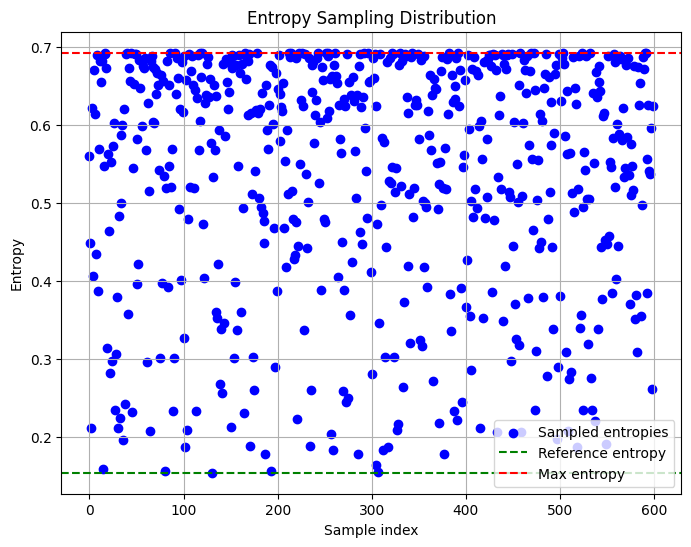

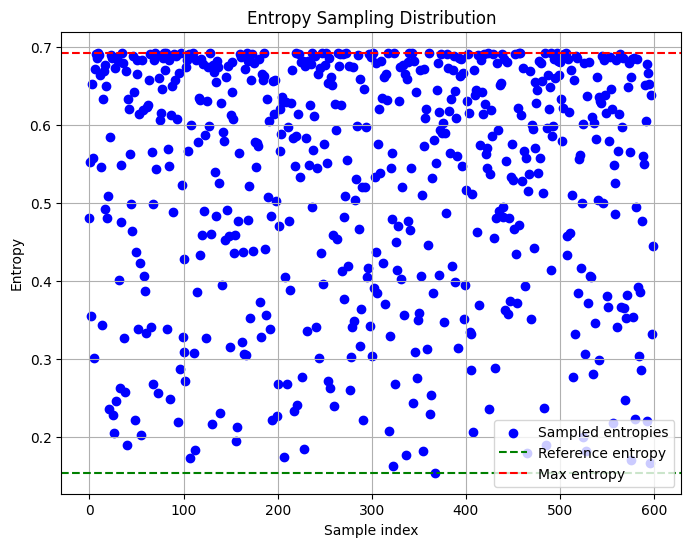

In [5]:
max_entropy = torch.log(torch.tensor(2))

plot_sampled_entropy(entropies_0, ref_entropy, max_entropy)
plot_sampled_entropy(entropies_1, ref_entropy, max_entropy)